In [40]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [41]:
# read data
#path = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"
path="Data-Collisions.csv"
df = pd.read_csv(path)

In [42]:
# check if the data is loaded correctly
df.head()
df.shape

(194673, 38)

In [43]:
# use colums that doesnt have dominating categorial objects
acc_df=df[['UNDERINFL','ADDRTYPE','ROADCOND','WEATHER','LIGHTCOND','SEVERITYCODE']]

# filter out all the unknown rows
acc_df = acc_df[df.ROADCOND != "Unknown"]
acc_df = acc_df[df.WEATHER != "Unknown"]
acc_df = acc_df[df.LIGHTCOND != "Unknown"]
acc_df = acc_df[df.ROADCOND != "Other"]
acc_df = acc_df[df.WEATHER != "Other"]
acc_df = acc_df[df.LIGHTCOND != "Other"]
acc_df.shape

<ipython-input-43-1617dae55ed6>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acc_df = acc_df[df.WEATHER != "Unknown"]
<ipython-input-43-1617dae55ed6>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acc_df = acc_df[df.LIGHTCOND != "Unknown"]
<ipython-input-43-1617dae55ed6>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acc_df = acc_df[df.ROADCOND != "Other"]
<ipython-input-43-1617dae55ed6>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acc_df = acc_df[df.WEATHER != "Other"]
<ipython-input-43-1617dae55ed6>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acc_df = acc_df[df.LIGHTCOND != "Other"]


(175216, 6)

In [44]:
# convert the colums to numeric values to apply machine learning
cleanup_nums = {"ADDRTYPE":{"Block": 0, "Intersection": 1, "Alley": 0},
                "ROADCOND":{"Dry": 1,"Wet":0,"Ice":0,"Snow/Slush":0,"Standing Water":0,"Sand/Mud/Dirt":0,"Oil":0},
                "WEATHER": {"Clear": 1, "Raining": 0, "Overcast": 0, "Snowing": 0,"Fog/Smog/Smoke": 0, 
                            "Sleet/Hail/Freezing Rain": 0, "Blowing Sand/Dirt": 0,"Severe Crosswind": 0,"Partly Cloudy": 0 },
                "LIGHTCOND": {"Daylight": 1,"Dark - Street Lights On": 0,"Dusk": 0,"Dawn": 0,"Dark - No Street Lights": 0,
                              "Dark - Street Lights Off": 0,"Dark - Unknown Lighting": 0},
                "UNDERINFL": {"N": 0, "Y": 1}}
#To convert the columns to numbers using replace 
acc_df.replace(cleanup_nums, inplace=True)

acc_df["SEVERITYCODE"]=acc_df["SEVERITYCODE"]-1
acc_df.head()

,UNDERINFL,ADDRTYPE,ROADCOND,WEATHER,LIGHTCOND,SEVERITYCODE
0,0,1.0,0.0,0.0,1.0,1
1,0,0.0,0.0,0.0,0.0,0
2,0,0.0,1.0,0.0,1.0,0
3,0,0.0,1.0,1.0,1.0,0
4,0,1.0,0.0,0.0,1.0,1


0.0    161329
1.0      9003
Name: UNDERINFL, dtype: int64

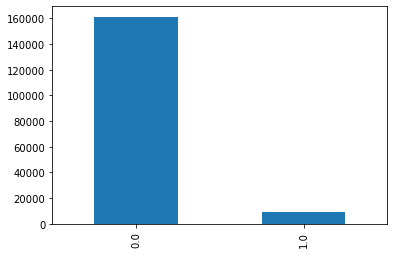

In [46]:
acc_df['UNDERINFL'] = acc_df['UNDERINFL'].astype(float)
acc_df['UNDERINFL'].value_counts().plot(kind='bar')
acc_df['UNDERINFL'].value_counts()



In [49]:
# lets rename the colums so it makes more sense
acc_df.rename(columns={"ADDRTYPE":"Intersection",'ROADCOND':'Dry_Road', 'WEATHER':'Clear_Weather','LIGHTCOND':'Daylight','SEVERITYCODE': 'Injure'}, inplace=True)
acc_df.head()

,UNDERINFL,Intersection,Dry_Road,Clear_Weather,Daylight,Injure
0,0.0,1.0,0.0,0.0,1.0,1
1,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,1.0,0.0,1.0,0
3,0.0,0.0,1.0,1.0,1.0,0
4,0.0,1.0,0.0,0.0,1.0,1


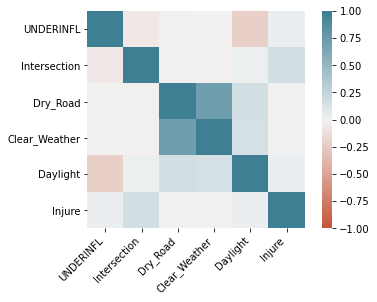

In [50]:
corr = acc_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [13]:
X=np.array(acc_df[["ADDRTYPE","Dry_Road","Clear_Weather","Daylight"]])
y=np.array(acc_df["Injure"])

In [9]:
# import tool needed
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [10]:
# split our dataset into train and test set

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=5)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (140172, 4) (140172,)
Test set: (35044, 4) (35044,)


In [11]:
# Modeling (Logistic Regression with Scikit-learn)
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

ValueError: could not convert string to float: 'Dark - No Street Lights'

Block           110922
Intersection     62873
Alley              601
Name: ADDRTYPE, dtype: int64

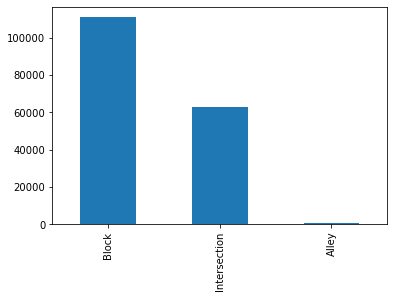

In [5]:
acc_df['ADDRTYPE'].value_counts().plot(kind='bar')
acc_df['ADDRTYPE'].value_counts()

Dry               121692
Wet                46378
Ice                 1083
Snow/Slush           837
Standing Water       105
Sand/Mud/Dirt         66
Oil                   60
Name: ROADCOND, dtype: int64

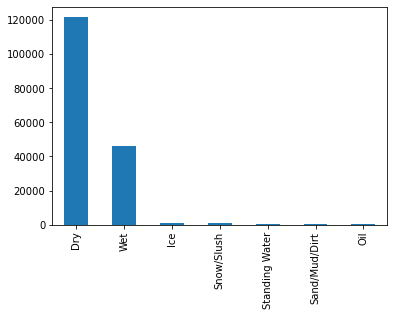

In [6]:
acc_df['ROADCOND'].value_counts().plot(kind='bar')
acc_df['ROADCOND'].value_counts()

Clear                       108951
Raining                      32676
Overcast                     26954
Snowing                        831
Fog/Smog/Smoke                 553
Sleet/Hail/Freezing Rain       107
Blowing Sand/Dirt               47
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

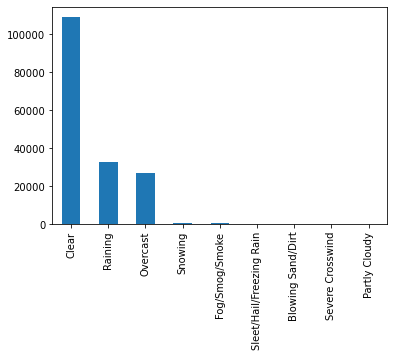

In [7]:
acc_df['WEATHER'].value_counts().plot(kind='bar')
acc_df['WEATHER'].value_counts()

Daylight                    112673
Dark - Street Lights On      46813
Dusk                          5661
Dawn                          2413
Dark - No Street Lights       1409
Dark - Street Lights Off      1120
Dark - Unknown Lighting          8
Name: LIGHTCOND, dtype: int64

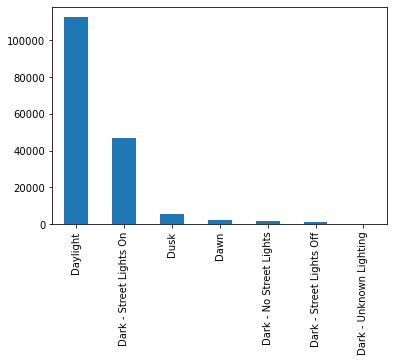

In [8]:
acc_df['LIGHTCOND'].value_counts().plot(kind='bar')
acc_df['LIGHTCOND'].value_counts()

1    118401
2     56815
Name: SEVERITYCODE, dtype: int64

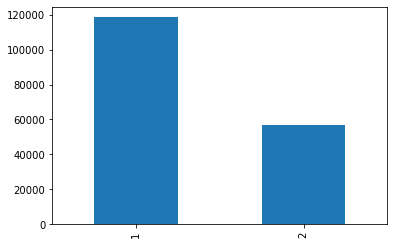

In [9]:
acc_df['SEVERITYCODE'].value_counts().plot(kind='bar')
acc_df['SEVERITYCODE'].value_counts()

In [10]:
# since we only have two SEVERITYCODE category, we can convert them into binary code
acc_df["SEVERITYCODE"]=acc_df["SEVERITYCODE"]-1
acc_df.head()

,ADDRTYPE,ROADCOND,WEATHER,LIGHTCOND,SEVERITYCODE
0,Intersection,Wet,Overcast,Daylight,1
1,Block,Wet,Raining,Dark - Street Lights On,0
2,Block,Dry,Overcast,Daylight,0
3,Block,Dry,Clear,Daylight,0
4,Intersection,Wet,Raining,Daylight,1


In [11]:
acc_df.rename(columns={'SEVERITYCODE': 'Injure'}, inplace=True)

In [51]:
dummy_variable_WEATHER = pd.get_dummies(acc_df["WEATHER"])
dummy_variable_ROADCOND = pd.get_dummies(acc_df["ROADCOND"])
dummy_variable_LIGHTCOND = pd.get_dummies(acc_df["LIGHTCOND"])
dummy_variable_ADDRTYPE = pd.get_dummies(acc_df['ADDRTYPE'])

KeyError: 'WEATHER'

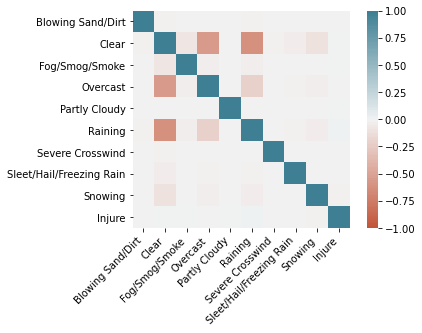

In [13]:
# which correlates with injuries more? Let see the weather first.
weather_injury_df = pd.concat([dummy_variable_WEATHER, acc_df["Injure"]], axis=1)
corr = weather_injury_df.corr()
ax.set_title ('Weather Condition')
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

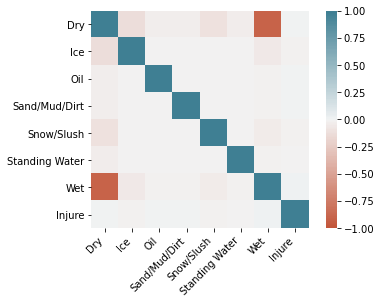

In [14]:
# which correlates with injuries more? Now we see the how road condition affect driving.
road_injury_df = pd.concat([dummy_variable_ROADCOND, acc_df["Injure"]], axis=1)
corr = road_injury_df.corr()
ax.set_title ('Road Condition')
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

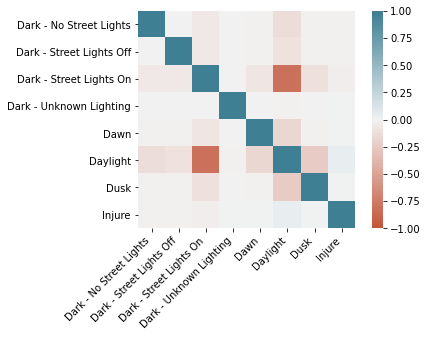

In [15]:
# which correlates with injuries more? Now we see the how lighting condition affect driving.
light_injury_df = pd.concat([dummy_variable_LIGHTCOND, acc_df["Injure"]], axis=1)
corr = light_injury_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

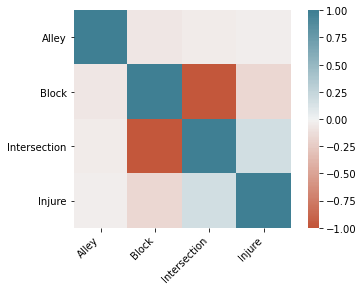

In [16]:
# which correlates with injuries more? Now we see the how intersection type affect driving.
type_injury_df = pd.concat([dummy_variable_ADDRTYPE, acc_df["Injure"]], axis=1)
corr = type_injury_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [17]:
#merge all these dummies
X_df = pd.concat([dummy_variable_LIGHTCOND, dummy_variable_WEATHER, dummy_variable_ROADCOND, dummy_variable_ADDRTYPE], axis=1)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [44]:
# now fitting our data into a logistic regression model, starting with weather
X=np.array(X_df)
y=np.array(acc_df["Injure"])

# split our dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=10)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

# Modeling (Logistic Regression with Scikit-learn)
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

# predict using our test set
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

# evaluate the model

#Jaccard Index
LogRJaccard = jaccard_score(y_test, yhat)
# F-1 Score
LogRF1 = f1_score(y_test, yhat, average='weighted')
#Log Loss
Logloss = log_loss(y_test, yhat_prob)

print("LogLoss: %.2f" % Logloss)
print("Avg F1-score: %.4f" % LogRF1)
print("Jaccard score: %.4f" % LogRJaccard)

KeyError: 'Injure'

NameError: name 'classification_report' is not defined

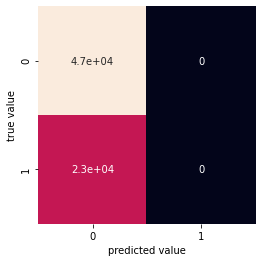

In [35]:
#Notes
#jaccard_score may be a poor metric if there are no positives for some samples or classes. 
#Jaccard is undefined if there are no true or predicted labels, and our implementation will return a score of 0 with a warning.

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[    0 22862]
 [    0 47225]]


Confusion matrix, without normalization
[[    0 22862]
 [    0 47225]]


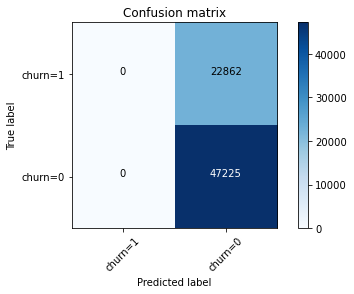

In [37]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [38]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.67      1.00      0.81     47225
           1       0.00      0.00      0.00     22862

    accuracy                           0.67     70087
   macro avg       0.34      0.50      0.40     70087
weighted avg       0.45      0.67      0.54     70087



C:\Users\Wuyue\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
weather_road_df = pd.concat([dummy_variable_WEATHER, dummy_variable_ROADCOND], axis=1)
weather_road_df.corr()

,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Dry,Ice,Oil,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet
Blowing Sand/Dirt,1.000000,-0.021004,-0.000922,-0.006984,-0.000088,-0.007843,-0.000196,-0.000405,-0.001131,-0.001243,0.016495,-0.000303,-0.000318,0.019084,-0.000401,-0.004298
Clear,-0.021004,1.000000,-0.072150,-0.546727,-0.006850,-0.613931,-0.015317,-0.031696,-0.088516,0.739086,-0.006370,-0.011646,-0.004876,-0.073474,-0.028032,-0.674404
Fog/Smog/Smoke,-0.000922,-0.072150,1.000000,-0.023992,-0.000301,-0.026941,-0.000672,-0.001391,-0.003884,-0.007306,0.041001,-0.001041,0.009395,-0.000947,-0.001378,0.003835
Overcast,-0.006984,-0.546727,-0.023992,1.000000,-0.002278,-0.204147,-0.005093,-0.010540,-0.029434,-0.094452,0.011181,-0.001052,0.005582,-0.001092,-0.005916,0.124119
Partly Cloudy,-0.000088,-0.006850,-0.000301,-0.002278,1.000000,-0.002558,-0.000064,-0.000132,-0.000369,0.001223,-0.000421,-0.000099,-0.000104,-0.000370,-0.000131,-0.000783
Raining,-0.007843,-0.613931,-0.026941,-0.204147,-0.002558,1.000000,-0.005720,-0.011835,-0.033052,-0.701965,-0.035142,0.017273,-0.000988,-0.014045,0.040965,0.769188
Severe Crosswind,-0.000196,-0.015317,-0.000672,-0.005093,-0.000064,-0.005720,1.000000,-0.000295,-0.000825,-0.007638,0.017348,-0.000221,-0.000232,-0.000828,-0.000293,0.005830
Sleet/Hail/Freezing Rain,-0.000405,-0.031696,-0.001391,-0.010540,-0.000132,-0.011835,-0.000295,1.000000,-0.001706,-0.034765,0.048160,-0.000458,-0.000480,0.085402,0.027715,0.014494
Snowing,-0.001131,-0.088516,-0.003884,-0.029434,-0.000369,-0.033052,-0.000825,-0.001706,1.000000,-0.100121,0.157780,-0.001278,0.007222,0.596404,-0.001690,-0.012420
Dry,-0.001243,0.739086,-0.007306,-0.094452,0.001223,-0.701965,-0.007638,-0.034765,-0.100121,1.000000,-0.118913,-0.027907,-0.029270,-0.104465,-0.036923,-0.904671


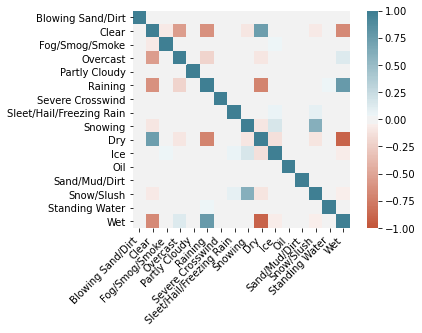

In [51]:
# convert the colums to numeric values to apply machine learning
cleanup_nums = {"ADDRTYPE":{"Block": 1, "Intersection": 2, "Alley": 3},
                "ROADCOND":{"Dry": 1,"Wet":0,"Ice":0,"Snow/Slush":0,"Standing Water":0,"Sand/Mud/Dirt":0,"Oil":0},
                "WEATHER": {"Clear": 1, "Raining": 0, "Overcast": 0, "Snowing": 0,"Fog/Smog/Smoke": 0, 
                            "Sleet/Hail/Freezing Rain": 0, "Blowing Sand/Dirt": 0,"Severe Crosswind": 0,"Partly Cloudy": 0 },
                "LIGHTCOND": {"Daylight": 1,"Dark - Street Lights On": 0,"Dusk": 0,"Dawn": 0,"Dark - No Street Light": 0,
                              "Dark - Street Lights Off": 0,"Dark - Unknown Lighting": 0}}
#To convert the columns to numbers using replace :
acc_df.replace(cleanup_nums, inplace=True)
acc_df.head()

,ADDRTYPE,ROADCOND,WEATHER,LIGHTCOND,SEVERITYCODE
0,2.0,0.0,0.0,1,1
1,1.0,0.0,0.0,0,0
2,1.0,1.0,0.0,1,0
3,1.0,1.0,1.0,1,0
4,2.0,0.0,0.0,1,1


In [30]:
# lets rename the colums so it makes more sense
acc_df.rename(columns={'ROADCOND':'Dry_Road', 'WEATHER':'Clear_Weather','LIGHTCOND':'Daylight','SEVERITYCODE': 'Injure'}, inplace=True)
acc_df.head()

,ADDRTYPE,Dry_Road,Clear_Weather,Daylight,Injure
0,2.0,0.0,0.0,1,1
1,1.0,0.0,0.0,0,0
2,1.0,1.0,0.0,1,0
3,1.0,1.0,1.0,1,0
4,2.0,0.0,0.0,1,1


In [33]:
acc_df.corr()

,ADDRTYPE,Dry_Road,Clear_Weather,Injure
ADDRTYPE,1.000000,-0.011187,-0.010187,0.165076
Dry_Road,-0.011187,1.000000,0.724937,-0.003945
Clear_Weather,-0.010187,0.724937,1.000000,-0.001880
Injure,0.165076,-0.003945,-0.001880,1.000000


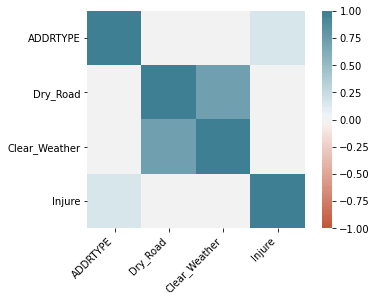

In [35]:
import seaborn as sns
corr = acc_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);